In [1]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Для глубокой нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Игнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)

from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve       # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
)

In [3]:
def check_missing_values(df):

    missing_info = df.isnull().sum()
    total_missing = missing_info.sum()

    if total_missing == 0:
        return {"message": "No missing values found."}
    else:
        missing_percentage = (missing_info[missing_info > 0] / len(df)) * 100
        return {
            "total_missing": total_missing,
            "missing_columns": missing_percentage.to_dict()
        }

In [4]:
def check_duplicates(df):

    duplicate_rows = df.duplicated().sum()

    if duplicate_rows == 0:
        return {"message": "No duplicate rows found."}
    else:
        return {"total_duplicates": duplicate_rows}

1. Загрузка и исследование датасета

In [5]:
# Загрузка данных

train = pd.read_csv('Training.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
train.shape

(4920, 134)

In [8]:
train['prognosis'].nunique()

41

In [9]:
train.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Unnamed: 133             0
Length: 134, dtype: int64

In [10]:
train['prognosis'].value_counts(normalize=False, ascending=False)

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [11]:
check_missing_values(train)

{'total_missing': 4920, 'missing_columns': {'Unnamed: 133': 100.0}}

In [12]:
check_duplicates(train)

{'total_duplicates': 4616}

In [17]:
train_eda = train.copy() # создание копии датасета для корреляционного анализа

In [20]:
# Бинарный индикатор каждого диагноза (0 - есть заболевание, 1 - нет) в 'prognosis' целевой переменной

unique_diagnoses = train_eda['prognosis'].unique()
binary_indicators = pd.DataFrame()
for diagnosis in unique_diagnoses:
    binary_indicators[diagnosis] = (train_eda['prognosis'] == diagnosis).astype(int)

In [32]:
# таблица топ-5 признаков и их корреляции с каждым диагнозом

numeric_data = train_eda.select_dtypes(include='number')

top_features_per_diagnosis = {}
max_correlated_features = []
max_correlation_values = []
for diagnosis in unique_diagnoses:
    correlations = numeric_data.corrwith(binary_indicators[diagnosis]).abs().sort_values(ascending=False)
    top_features = correlations.head(5).index
    top_features_per_diagnosis[diagnosis] = top_features
    max_feature = correlations.idxmax()
    max_value = correlations.max()
    max_correlated_features.append(max_feature)
    max_correlation_values.append(max_value)
      
correlation_table = []

for diagnosis in unique_diagnoses[:5]:  # только первые 5 диагнозов для визуализации
    for feature in top_features_per_diagnosis[diagnosis]:
        correlation_value = numeric_data.corrwith(binary_indicators[diagnosis])[feature]
        correlation_table.append({
            "Diagnosis": diagnosis,
            "Feature": feature,
            "Correlation": correlation_value
        })

correlation_df = pd.DataFrame(correlation_table)
print(correlation_df)

              Diagnosis               Feature  Correlation
0      Fungal infection  nodal_skin_eruptions     0.947500
1      Fungal infection   dischromic _patches     0.947500
2      Fungal infection               itching     0.349624
3      Fungal infection             skin_rash     0.319458
4      Fungal infection               fatigue    -0.127140
5               Allergy             shivering     0.947500
6               Allergy    watering_from_eyes     0.947500
7               Allergy   continuous_sneezing     0.651188
8               Allergy                chills     0.316462
9               Allergy               fatigue    -0.127140
10                 GERD      ulcers_on_tongue     0.947500
11                 GERD          stomach_pain     0.689274
12                 GERD               acidity     0.651188
13                 GERD                 cough     0.414599
14                 GERD            chest_pain     0.366833
15  Chronic cholestasis               itching     0.3725

Top features for Fungal infection:


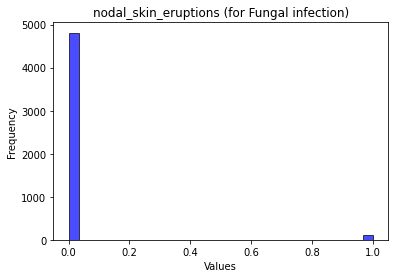

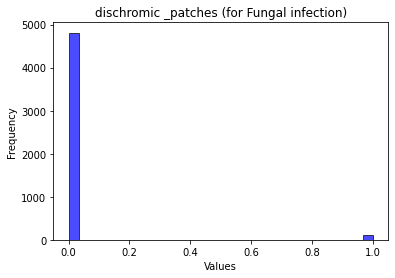

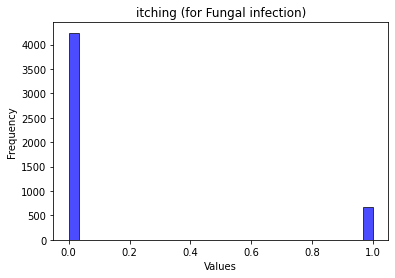

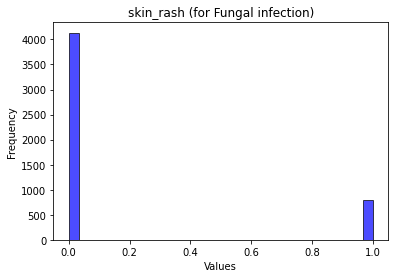

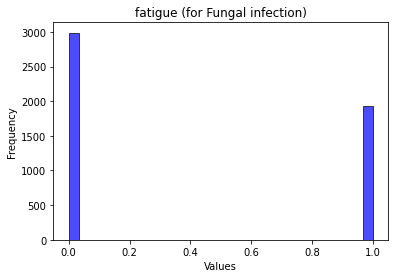

Top features for Allergy:


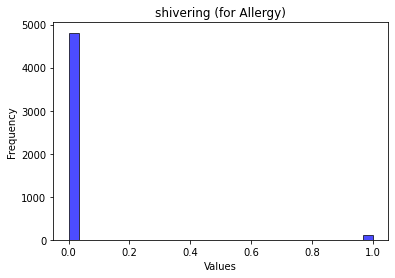

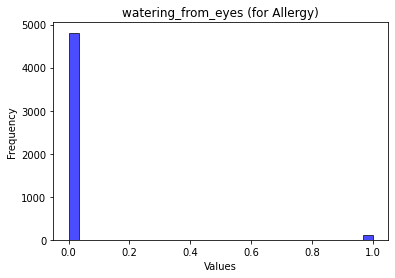

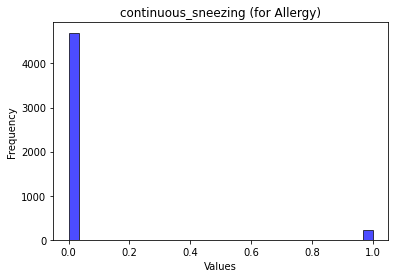

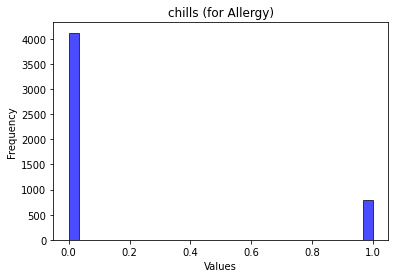

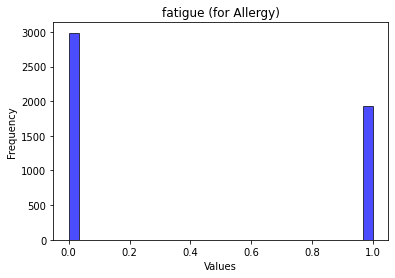

Top features for GERD:


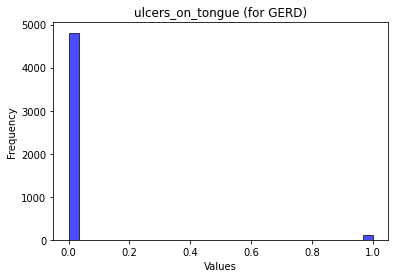

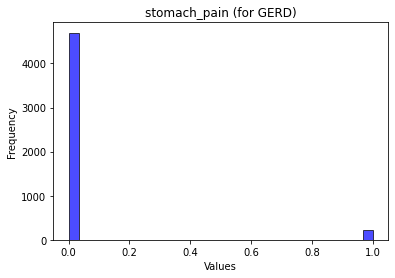

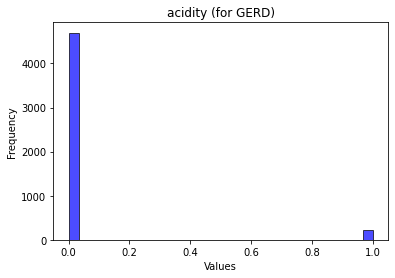

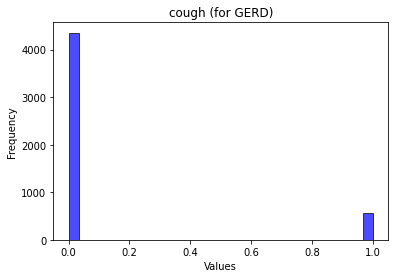

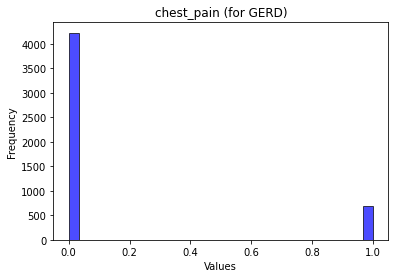

Top features for Chronic cholestasis:


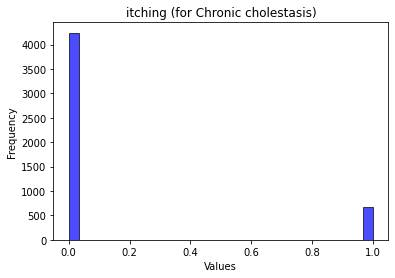

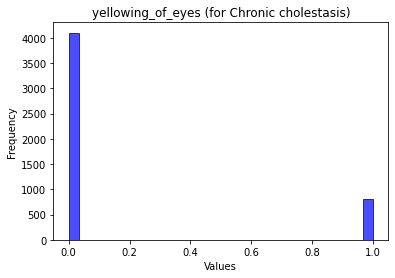

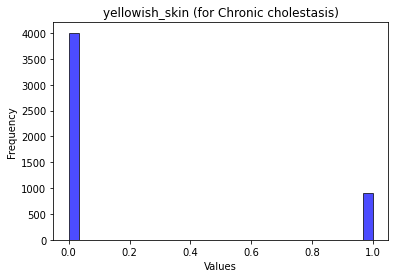

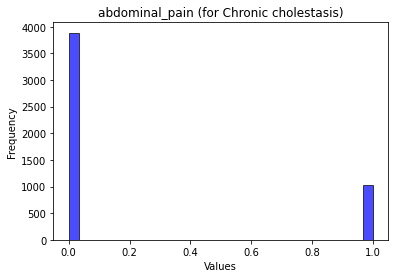

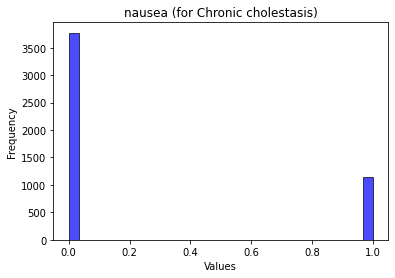

Top features for Drug Reaction:


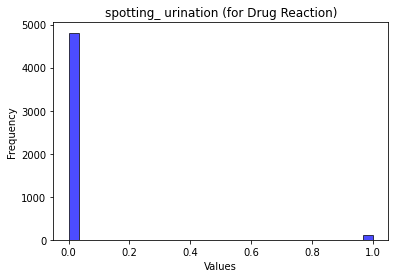

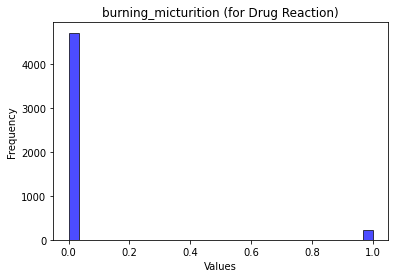

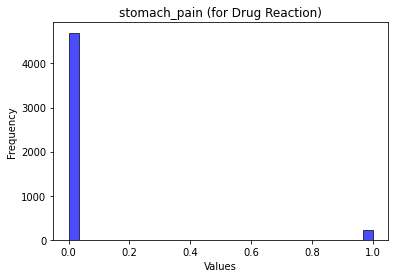

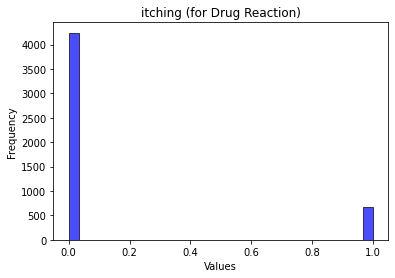

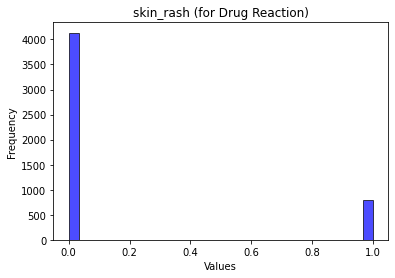

In [22]:
# Визуализация топ-5 признаков и их корреляции с несколькими диагнозами

for diagnosis in unique_diagnoses[:5]: 
    print(f"Top features for {diagnosis}:")
    for feature in top_features_per_diagnosis[diagnosis]:
        plt.figure(figsize=(6, 4))
        plt.hist(numeric_data[feature].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f"{feature} (for {diagnosis})", fontsize=12)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()

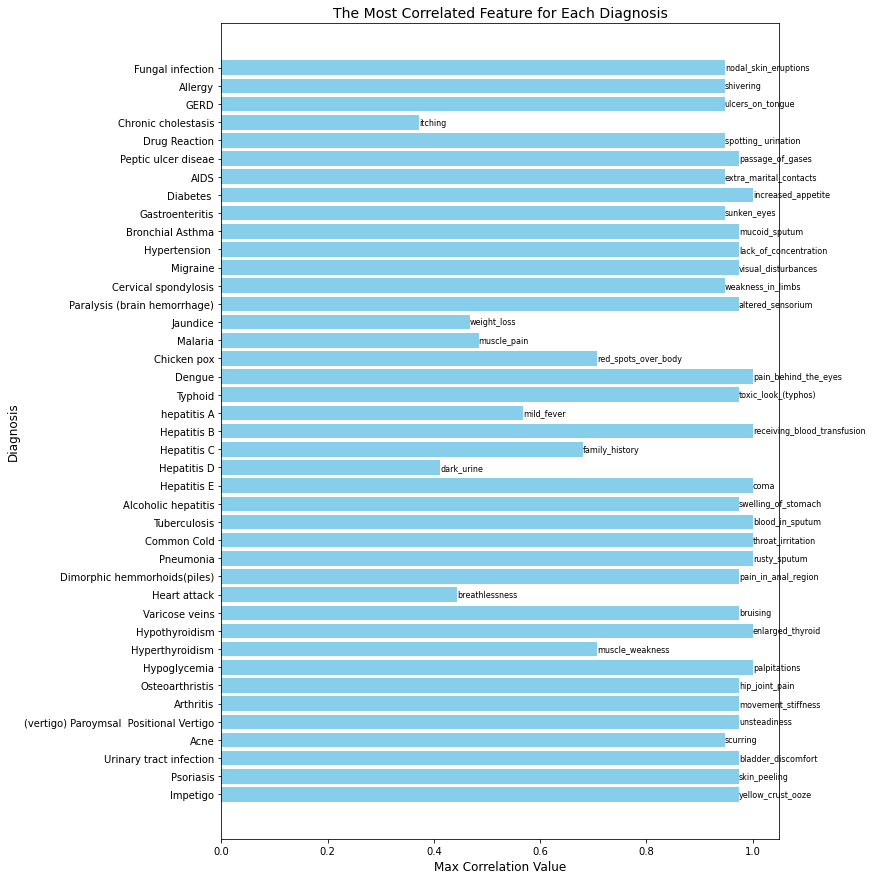

In [33]:
# Creating a bar plot

plt.figure(figsize=(10, 15))
plt.barh(unique_diagnoses, max_correlation_values, color='skyblue')
plt.xlabel('Max Correlation Value', fontsize=12)
plt.ylabel('Diagnosis', fontsize=12)
plt.title('The Most Correlated Feature for Each Diagnosis', fontsize=14)
plt.gca().invert_yaxis()  # Invert Y-axis to have the first diagnosis on top

# Adding feature names as labels on the bars
for i, (feature, value) in enumerate(zip(max_correlated_features, max_correlation_values)):
    plt.text(value, i, f"{feature}", va='center', fontsize=8)

plt.show()